In [1]:
# =============================================================================
# MODULES
# =============================================================================
import wandb
import pandas as pd
import seaborn as sns
import pandas_profiling

### Start run and read W&B artifact

In [2]:
run = wandb.init(project='nyc_airbnb',
                group='eda',
                save_code=True)

wandb: Currently logged in as: christonikos. Use `wandb login --relogin` to force relogin


In [3]:
local_path = wandb.use_artifact('sample.csv:latest').file()
df = pd.read_csv(local_path) 

### Dataset structure and general information

In [ ]:
print(df.head(5))

In [ ]:
# extract number of features 

# Feature & target distribution overview

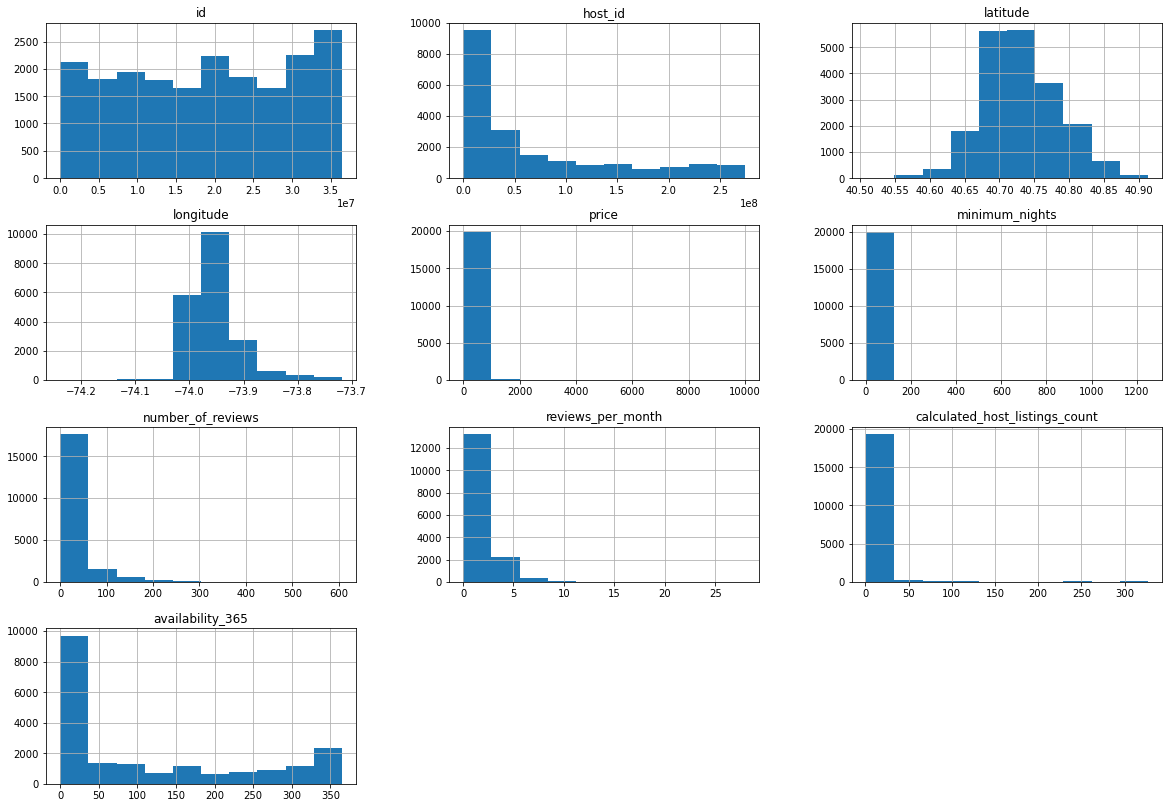

In [5]:
_ = df.hist(figsize=(20, 14))

Add my comments here

In [ ]:
n_samples_to_plot = 500
_ = sns.pairplot(
    data=df[:n_samples_to_plot],
    vars=df.columns,
    hue='price',
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

In [ ]:
df.isnull().sum()

#### Comment 
* The sample consists of 20000 rows and 15 columns
* Four columns have null values, i.e. *name*, *host_name*, *last_review*, *reviews_per_month*.
* In particular *last_review* and *reviews_per_month* have the same number of NaNs. We can check whether they are related to the same listing, and if each listing has a *number_of_reviews* equal to 0. (**Assumption 1**)
* The following columns are of dtype *str*:
    - *name*
    - *host_name*
    - *neighbourhood_group*
    - *neighbourhood*
    - *room_type*
    - *last_review* -> this one could be further formatted in type timestamp 
* Based on the low cardinality, some of these features can be considered categorical:
    - *neighbourhood*
    - *room_type*
* The remaining features are numerical, either integers or floating numbers

#### Testing Assumption 1

In [ ]:
subset = df[df['last_review'].isnull()][['number_of_reviews','last_review', 'reviews_per_month']]
subset.head()

In [ ]:
subset.sum()

In [ ]:
subset.isnull().sum()

#### Comment 
**Assumption 1** is validated!
Features *last_review* and *reviews_per_month* are both NaNs when the *number_of_reviews* is equal to 0. It makes sense, as no reviews implies that no date the *last_review* can be retrieved and the calculation that output *reviews_per_month* cannot be computed.

### Statistical description of the sample 

In [ ]:
df.describe()

#### Comment 
* Comparing the percentile values and the max values, some features seem to have outliers. In particular:
    - *price*
    - *minimum_nights*
    - *number_of_reviews*
    - *reviews_per_month*
    - *calculated_host_listings_count*
* This observation calls for further investigation 

### Profile Report 

In [ ]:
#!pip install ipywidgets

In [ ]:
profile = pandas_profiling.ProfileReport(df)

In [ ]:
profile

#### Comments
* Many of the observations found above are also validated in the report.
* Variables:
    - *number_of_reviews* and *availability_365* have many zeroes
* Most interesting correlations:
    - *price* is inversely correlated to *longitude* but not so much with *latitude*
    - *number_of_reviews* is highly correlated to *reviews_per_month* as one could expect
    - *availability_365* is loosely and positevely correlated to *reviews*, *reviews_per_month* and *calculated_host_listings_count*

### Fix problems

In [ ]:
# Drop outliers
min_price = 10
max_price = 350
min_nights= 1 
max_nights= 365
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
idx = df['minimum_nights'].between(min_nightshts, max_nights)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
df.describe()

In [ ]:
df.info()

#### Comments
* We can confirm that cleaning steps were successfully performed  

### Finish run

In [ ]:
run.finish()